In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px 
from wordcloud import WordCloud, STOPWORDS

from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rashikrahmanpritom/data-science-job-posting-on-glassdoor")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\uniat\.cache\kagglehub\datasets\rashikrahmanpritom\data-science-job-posting-on-glassdoor\versions\1


In [3]:
df_orginal = pd.read_csv(path+"//Uncleaned_DS_jobs.csv")
df = df_orginal.copy()
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [5]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (672, 15)
Size      : 10080
Dimension : 2


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,672.0,335.500000,194.133974,0.0,167.75,335.5,503.25,671.0
Rating,672.0,3.518601,1.410329,-1.0,3.30,3.8,4.30,5.0
Founded,672.0,1635.529762,756.746640,-1.0,1917.75,1995.0,2009.00,2019.0


In [8]:
# Column Names
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

In [9]:
# Drop Index
df.drop(['index'], inplace=True, axis=1)

df.drop_duplicates(inplace=True)

In [10]:
# -1
for col in df.columns[df.isin([-1, "-1"]).any()].tolist():
    df[col] = np.where(df[col] == -1.0, "0", df[col])
    df[col] = np.where(df[col] == '-1', "0", df[col])

In [11]:
# Job Title
df['job_title'] = df['job_title'].replace({'Junior ': 'Jr. ', 
                                           'Senior ': 'Sr. ',
                                           'Sr ': 'Sr. '}, regex=True)

In [12]:
# Salary Estimate
df.rename(columns={"salary_estimate": "salary_estimate_($k)"}, inplace=True)


df['salary_estimate_($k)'] = df['salary_estimate_($k)'].replace({'\$': '', 
                                                                 'K': '', 
                                                                 ' \(Glassdoor est.\)': '',
                                                                 '\(Employer est.\)': ''}, regex=True)

In [13]:
# Job Description
df['job_description'] = df['job_description'].replace({'\n\n':' ',
                                                       '\n':' '}, regex=True)

In [14]:
# Company Name
df['company_name'] = df['company_name'].apply(lambda x: x.split('\n')[0])

In [15]:
# Size
df.rename(columns={"size": "size_(employee)"}, inplace=True)

df['size_(employee)'] = df['size_(employee)'].replace({' to ': '-', 
                                                       ' employees': ''}, regex=True)

In [16]:
# Revenue
df.rename(columns={"revenue": "revenue_($)"}, inplace=True)

df['revenue_($)'] = df['revenue_($)'].replace({'\$': '', 
                                               ' \(USD\)': ''}, regex=True)

In [17]:
# Min, Max and Avg Salary
df[['min_salary', 'max_salary']] = df['salary_estimate_($k)'].apply(lambda x: pd.Series(x.split('-'))).astype(int)
df['avg_salary'] = df.apply(lambda x: int((x['min_salary'] + x['max_salary']) / 2), axis=1)

In [18]:
# Rating Categorization
def rating_categorizer(value):
    if value == "0":
        return value
    else:
        value = float(value)
        if 0.0 <= value <= 1.50:
            return "Very Dissatisfied"
        elif 1.51 <= value <= 2.50:
            return "Dissatisfied"
        elif 2.51 <= value <= 3.50:
            return "OK"
        elif 3.51 <= value <= 4:
            return "Satisfied"
        else:
            return "Very Satisfied"
    
df["ratings_categoric"] = df['rating'].apply(lambda x: rating_categorizer(x))

In [19]:
# Location city and state of company
df['location_city'] = df['location'].apply(lambda x: x.split(",")[0])
df['location_state_abbr'] = df['location'].apply(lambda x: x.split(",")[-1])

# Change non-cities in laction_city to "na"
df['location_city'] = df['location_city'].replace({'Utah': 'N/a',
                                                   'New Jersey': 'N/a', 
                                                   'Texas': 'N/a',
                                                   'California': 'N/a',
                                                   'Remote': 'N/a',
                                                   'United States': 'N/a'}, regex=True)

# Standardization of abbreviations
df['location_state_abbr'] = df['location_state_abbr'].replace({'Utah': 'UT',
                                                               'New Jersey': 'NJ', 
                                                               'Texas': 'TX',
                                                               'California': 'CA',
                                                               'Remote': 'N/a',
                                                               'United States': 'N/a'}, regex=True)

In [20]:
# The number 3 was chosen because one of the headquarters is "New York, 061".
def hq_state_city_country(values, type=None):
    state = values.split(", ")[-1]
    city = values.split(", ")[0]
    
    if "unknown" in values:
        return values
    elif len(state) > 3:
        if type=='country':
            return state
        elif type=='city':
            return city
        else:
            return "None"
    else:
        if type=="city":
            return city
        elif type=='state':
            return state
        else:
            return "America"
    
    
df['headquarters_city'] = df['headquarters'].apply(lambda x: hq_state_city_country(x, "city"))
df['headquarters_state'] = df['headquarters'].apply(lambda x: hq_state_city_country(x, 'state'))
df['headquarters_country'] = df['headquarters'].apply(lambda x: hq_state_city_country(x, 'country'))

In [21]:
# Company age
df['company_age'] = df['founded'].apply(lambda x: x if x == "0" else datetime.now().year - int(x))

In [22]:
# "excel" --> " excel " because excellent
# "aws" --> " aws" because laws

r_cases = [' r ', ' r,', ' r)']
skills = ['python', ' excel ', 'hadoop', 'spark', ' aws',
          'tableau', 'big data', 'sql', 'c++', 
          'java', 'scala']

for skill in skills:
    df[skill.strip()] = df['job_description'].apply(lambda x: 1 if skill in x.lower() else 0)

df['r'] = df['job_description'].apply(lambda x: 1 if any(r in x.lower() for r in r_cases) else 0)

# **VISUALIZATION**

In [23]:
fig = go.Figure(data=[go.Pie(labels=df['ratings_categoric'].value_counts().index, 
                             values=df['ratings_categoric'].value_counts(),
                             textinfo='label+percent')])

fig.update_layout(title="Rating", 
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.02,
                              xanchor="right",
                              x=1, 
                              font_size=14),
                 margin=dict(t=100, b=0, l=0, r=0))

fig.update_traces(hoverinfo='label+value',
                  textfont_size=15,
                  marker=dict(colors=px.colors.qualitative.Set3))

fig.show()

In [24]:
fig = go.Figure(data=[go.Pie(labels=df['size_(employee)'].value_counts().index, 
                             values =df['size_(employee)'].value_counts(),
                             textinfo='label+percent', 
                             hole=.2)])

fig.update_layout(title="Companies Sizes (Employee)",
                  legend=dict(yanchor="bottom",
                              y=0.3,
                              xanchor="left",
                              x=-0.2, 
                              font_size=14),
                  margin=dict(t=100, b=0, l=0, r=0))

fig.show()

In [25]:
size_order = ["0", 'Unknown', '1-50',
              '51-200', '201-500', '501-1000', '1001-5000', 
              '5001-10000', '10000+']

fig = px.bar(df, 
             x="size_(employee)",
             labels={'size_(employee)': 'Company Size (Employee)',
                     'count': '# Company'}, 
             color='size_(employee)',
             color_discrete_sequence=px.colors.qualitative.Plotly,
             category_orders={'size_(employee)': size_order,
                              'Company Size (Employee)': size_order})

fig.update_layout(title="Company Size (Employee)",
                  title_x=0.5)

fig.update_xaxes(ticks="outside",
                 tickcolor="white",
                 ticklen=10)

fig.show()

In [26]:
fig = go.Figure([go.Bar(x=df['revenue_($)'].value_counts().index, 
                        y=df['revenue_($)'].value_counts())])

fig.update_layout(title="Number of Companies by revenue",
                  title_x=0.5)

fig.update_traces(marker_color=px.colors.qualitative.Alphabet, 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, 
                  opacity=0.6)
fig.show()

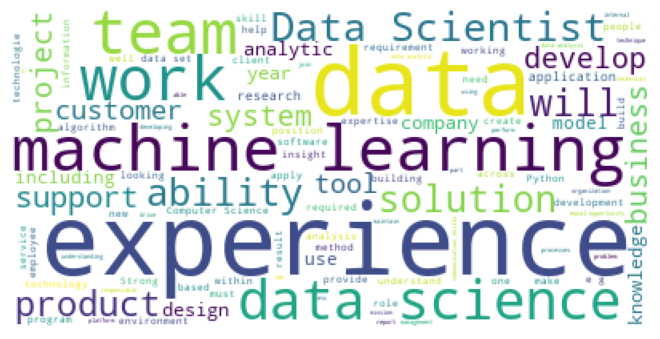

In [27]:
Stopwords = set(STOPWORDS)
text = " ".join(review for review in df.job_description)

wordcloud = WordCloud(max_words=100, 
                      background_color='white',
                      stopwords=Stopwords).generate(text)
                       
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [28]:
df.columns

Index(['job_title', 'salary_estimate_($k)', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size_(employee)',
       'founded', 'type_of_ownership', 'industry', 'sector', 'revenue_($)',
       'competitors', 'min_salary', 'max_salary', 'avg_salary',
       'ratings_categoric', 'location_city', 'location_state_abbr',
       'headquarters_city', 'headquarters_state', 'headquarters_country',
       'company_age', 'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau',
       'big data', 'sql', 'c++', 'java', 'scala', 'r'],
      dtype='object')

In [29]:
df

,job_title,salary_estimate_($k),job_description,rating,company_name,location,headquarters,size_(employee),founded,type_of_ownership,...,hadoop,spark,aws,tableau,big data,sql,c++,java,scala,r
0,Sr. Data Scientist,137-171,Description The Senior Data Scientist is respo...,3.1,Healthfirst,"New York, NY","New York, NY",1001-5000,1993,Nonprofit Organization,...,0,0,1,0,0,0,0,0,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future Join the...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001-10000,1968,Company - Public,...,1,0,0,0,1,1,0,0,0,0
2,Data Scientist,137-171,Overview Analysis Group is one of the largest...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001-5000,1981,Private Practice / Firm,...,0,0,1,0,0,0,1,0,0,1
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Dat...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501-1000,2000,Company - Public,...,0,0,0,0,0,1,0,0,0,0
4,Data Scientist,137-171,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51-200,1998,Company - Private,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105-167,Summary We’re looking for a data scientist to ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001-5000,1989,Company - Private,...,1,0,0,1,1,1,0,0,0,0
668,Data Scientist,105-167,Job Description Become a thought leader within...,0,JKGT,"San Francisco, CA",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,Data Scientist,105-167,Join a thriving company that is changing the w...,0,AccessHope,"Irwindale, CA",0,0,0,0,...,1,0,0,1,0,1,1,1,1,1
670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1-50,0,Company - Private,...,1,1,0,0,1,1,0,1,1,1


In [32]:
df.dtypes

job_title               object
salary_estimate_($k)    object
job_description         object
rating                  object
company_name            object
location                object
headquarters            object
size_(employee)         object
founded                 object
type_of_ownership       object
industry                object
sector                  object
revenue_($)             object
competitors             object
min_salary               int32
max_salary               int32
avg_salary               int64
ratings_categoric       object
location_city           object
location_state_abbr     object
headquarters_city       object
headquarters_state      object
headquarters_country    object
company_age             object
python                   int64
excel                    int64
hadoop                   int64
spark                    int64
aws                      int64
tableau                  int64
big data                 int64
sql                      int64
c++     

In [36]:
df['rating']=df.rating.astype(float)

C:\Users\uniat\AppData\Local\Temp\ipykernel_38180\3739984898.py:12: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



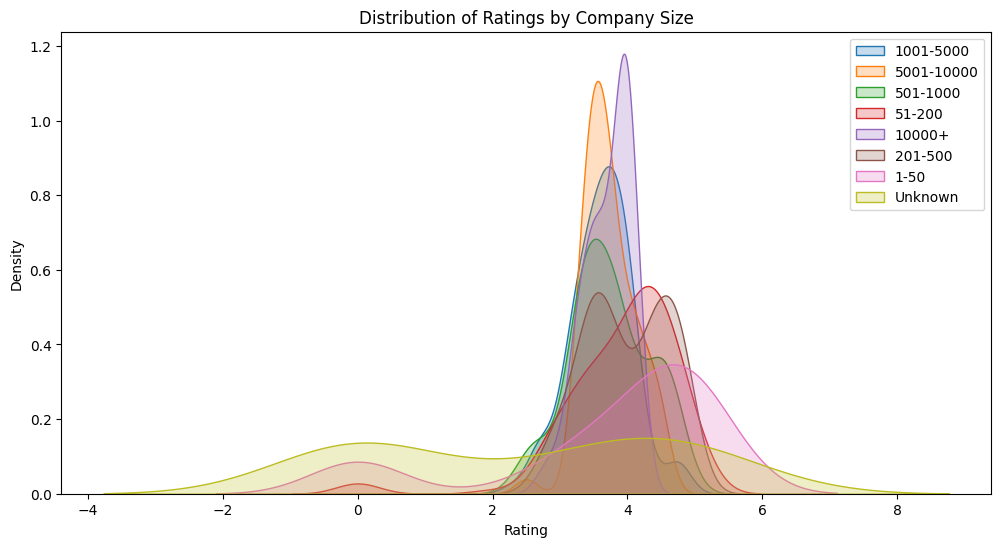

In [ ]:
df['size_(employee)'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].median(), inplace=True)


# KDE plot
import seaborn as sns
plt.figure(figsize=(12, 6))
for size in df['size_(employee)'].unique():
    sns.kdeplot(df[df['size_(employee)'] == size]['rating'], label=size, shade=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings by Company Size')
plt.legend()
plt.show()